# Code for multi-class fusion model-1 (ANN+SVM) using weighted score fusion

In [1]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.optimizers import Adam,SGD
from matplotlib import pyplot as plt
import numpy
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np

In [2]:
dataset = pd.read_csv("/content/sample_data/multiclassification.csv", delimiter=",")
dataset_array = dataset.to_numpy()
x = dataset_array[:,0:13]
y = dataset_array[:,13]

In [3]:
#for 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

#for 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)


In [4]:
X_train.shape

(212, 13)

In [5]:
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

Class=1, n=40 (18.868%)
Class=4, n=9 (4.245%)
Class=3, n=20 (9.434%)
Class=0, n=117 (55.189%)
Class=2, n=26 (12.264%)


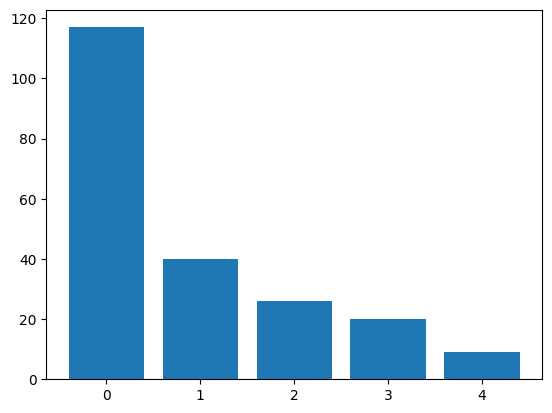

In [6]:
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

##### Over Sampling

In [7]:
from imblearn.over_sampling import RandomOverSampler

In [8]:
os=RandomOverSampler()
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0.0: 117, 1.0: 40, 2.0: 26, 3.0: 20, 4.0: 9})
The number of classes after fit Counter({1.0: 117, 4.0: 117, 3.0: 117, 0.0: 117, 2.0: 117})


Class=1, n=117 (20.000%)
Class=4, n=117 (20.000%)
Class=3, n=117 (20.000%)
Class=0, n=117 (20.000%)
Class=2, n=117 (20.000%)


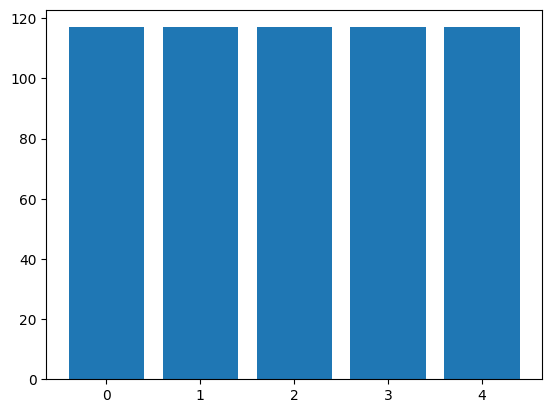

In [9]:
# summarize distribution
counter = Counter(y_train_ns)
for k,v in counter.items():
	per = v / len(y_train_ns) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [10]:
X_train=X_train_ns
y_train=y_train_ns

In [11]:
X_train.shape

(585, 13)

In [12]:
#StandardScaler for normalization for some algortihms
sc = StandardScaler()

#min-max scaler for normalization for some algortihms
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
#code for svm

from sklearn.svm import SVC
model1 = SVC(probability=True,C=.01)

X_train_scaled = sc.fit_transform(X_train)
X_train_svc=X_train_scaled[:,0:13]
X_test_scaled = sc.transform(X_test)
X_test_svc=X_test_scaled[:,0:13]


model1.fit(X_train_svc,y_train)
rounded_predictions1 = model1.predict(X_test_svc)
predictions1 =model1.predict_proba(X_test_svc)
y_pred1 = rounded_predictions1

import sklearn.metrics as metrics
scores=metrics.accuracy_score(y_test,y_pred1)
print("SVM",scores)

print(metrics.confusion_matrix(y_test,y_pred1))
print(metrics.classification_report(y_test,y_pred1))




SVM 0.5384615384615384
[[40  2  3  2  1]
 [ 6  2  1  1  4]
 [ 0  1  4  4  1]
 [ 1  2  5  3  4]
 [ 0  0  1  3  0]]
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84        48
         1.0       0.29      0.14      0.19        14
         2.0       0.29      0.40      0.33        10
         3.0       0.23      0.20      0.21        15
         4.0       0.00      0.00      0.00         4

    accuracy                           0.54        91
   macro avg       0.33      0.32      0.32        91
weighted avg       0.56      0.54      0.55        91



In [14]:


# code for ANN
import keras
from keras.models import Sequential
from keras import regularizers
from keras.regularizers import l2
from keras.layers import Dense ,BatchNormalization
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from tensorflow.keras.optimizers.legacy import Adam,SGD
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = MinMaxScaler(feature_range=(0,1))
# Define a Deep Learning Model
model4 = keras.models.Sequential()
model4.add(Dense(8, input_dim=13,use_bias=True,bias_initializer='zeros', activation='relu', kernel_regularizer=l2(0.01) ))
model4.add(Dense(5, activation='softmax'))
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model4.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])



#Normalize train & test sample
scaled_X_train_ann=scaler.fit_transform(X_train)
scaled_X_test_ann=scaler.transform(X_test)
# Train the Model

history=model4.fit(scaled_X_train_ann, y_train,validation_split=0.1, batch_size=5,epochs=20,shuffle=True,verbose=2)


predictions4 = model4.predict(scaled_X_test_ann,batch_size=5,verbose=0)
#rounded_predictions4 = model4.predict_classes(scaled_X_test_ann,batch_size=5,verbose=0)
rounded_predictions4=np.argmax(predictions4,axis=1)
y_pred4 = rounded_predictions4


#print(predictions)
import sklearn.metrics as metrics
scores4=metrics.accuracy_score(y_test,y_pred4)
print("ANN",scores4)

print(metrics.confusion_matrix(y_test,y_pred4))
print(metrics.classification_report(y_test,y_pred4))

Epoch 1/20
106/106 - 4s - loss: 1.7208 - accuracy: 0.2243 - val_loss: 1.6923 - val_accuracy: 0.0000e+00 - 4s/epoch - 33ms/step
Epoch 2/20
106/106 - 1s - loss: 1.6710 - accuracy: 0.2376 - val_loss: 1.7648 - val_accuracy: 0.0000e+00 - 697ms/epoch - 7ms/step
Epoch 3/20
106/106 - 0s - loss: 1.6529 - accuracy: 0.2452 - val_loss: 1.8853 - val_accuracy: 0.0000e+00 - 481ms/epoch - 5ms/step
Epoch 4/20
106/106 - 0s - loss: 1.6394 - accuracy: 0.2452 - val_loss: 1.9366 - val_accuracy: 0.0000e+00 - 425ms/epoch - 4ms/step
Epoch 5/20
106/106 - 0s - loss: 1.6240 - accuracy: 0.2529 - val_loss: 1.9432 - val_accuracy: 0.0000e+00 - 333ms/epoch - 3ms/step
Epoch 6/20
106/106 - 0s - loss: 1.6091 - accuracy: 0.2738 - val_loss: 1.9689 - val_accuracy: 0.0000e+00 - 388ms/epoch - 4ms/step
Epoch 7/20
106/106 - 0s - loss: 1.5931 - accuracy: 0.3004 - val_loss: 1.9987 - val_accuracy: 0.0000e+00 - 467ms/epoch - 4ms/step
Epoch 8/20
106/106 - 0s - loss: 1.5773 - accuracy: 0.3403 - val_loss: 2.0061 - val_accuracy: 0.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:

#weighted fusion
#same procedure for every model(1,2 and 3). for every model we need to take the prediction
# values and then the values will be merged according to the procedure given in below.

p=1
#q=1-p
for i in range (19):
    p=p-.05
    q=1-p

    mixed=predictions1*p+predictions4*q


    out = []
    for i in range(len(y_test)):
        out.append(i)

    k=-1
    for i in range(len(y_test)):
        k=k+1
        for j in range(5):
            max=numpy.max(mixed[i])

        for j in range(5):
            if (mixed[i][j]== max):
                out[k]=j


    import numpy as np
    out = np.asarray(out)
    score3=metrics.accuracy_score(out,y_test)
    print("  mixed  p  q","%.4f" %score3, "%.2f" %p,"%.2f" %q)


#after selecting the value of p and q which gives the highest accuracy.This value differs for different algorithms.
p=.55
q=1-p
mixed=predictions1*p+predictions4*q


out = []
for i in range(len(y_test)):
    out.append(i)

k=-1
#mixed
for i in range(len(y_test)):
    k=k+1
    for j in range(5):
        max=numpy.max(mixed[i])
    for j in range(5):
        if (mixed[i][j]== max):
            out[k]=j


import numpy as np
out = np.asarray(out)
score3=metrics.accuracy_score(out,y_test)
print("MIXED",score3)




print(metrics.confusion_matrix(y_test,out))
print(metrics.classification_report(y_test,out))

macro_roc_auc_ovo = roc_auc_score(y_test, mixed, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, mixed, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, mixed, multi_class="ovr",average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, mixed, multi_class="ovr",average="weighted")
#print all score for roc
print("macro_ovo,weight_ovo,macro_ovr,weight_ovr",
        macro_roc_auc_ovo, weighted_roc_auc_ovo,macro_roc_auc_ovr ,weighted_roc_auc_ovr)


  mixed  p  q 0.5934 0.95 0.05
  mixed  p  q 0.6154 0.90 0.10
  mixed  p  q 0.6154 0.85 0.15
  mixed  p  q 0.6154 0.80 0.20
  mixed  p  q 0.5934 0.75 0.25
  mixed  p  q 0.5934 0.70 0.30
  mixed  p  q 0.5824 0.65 0.35
  mixed  p  q 0.5824 0.60 0.40
  mixed  p  q 0.5824 0.55 0.45
  mixed  p  q 0.5824 0.50 0.50
  mixed  p  q 0.5824 0.45 0.55
  mixed  p  q 0.5824 0.40 0.60
  mixed  p  q 0.5824 0.35 0.65
  mixed  p  q 0.5824 0.30 0.70
  mixed  p  q 0.5824 0.25 0.75
  mixed  p  q 0.5824 0.20 0.80
  mixed  p  q 0.5824 0.15 0.85
  mixed  p  q 0.5824 0.10 0.90
  mixed  p  q 0.5824 0.05 0.95
MIXED 0.5824175824175825
[[41  3  1  3  0]
 [ 6  5  2  1  0]
 [ 1  2  0  7  0]
 [ 1  1  6  7  0]
 [ 0  0  0  4  0]]
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85        48
         1.0       0.45      0.36      0.40        14
         2.0       0.00      0.00      0.00        10
         3.0       0.32      0.47      0.38        15
         4.0       0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-16-e41b6f891d25>:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


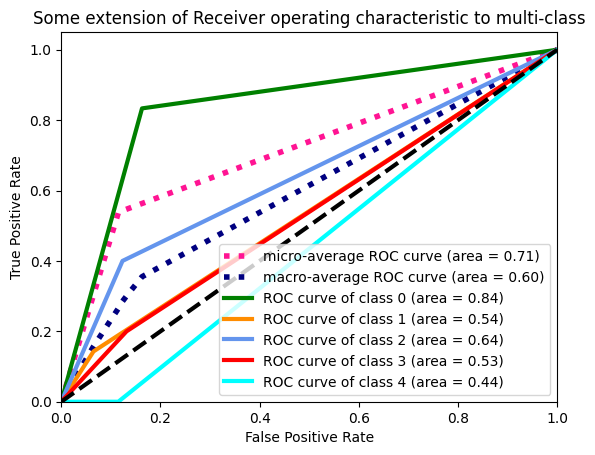

In [16]:

#ROC curve for SVM


from sklearn.preprocessing import label_binarize
y_test_h = label_binarize(y_test, classes=[0, 1, 2, 3, 4])


y_score1 = label_binarize(y_pred1, classes=[0, 1, 2, 3, 4])
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
n_classes=5
lw=3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_h[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_h.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue','red','aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()





<ipython-input-17-44502d7c53d5>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


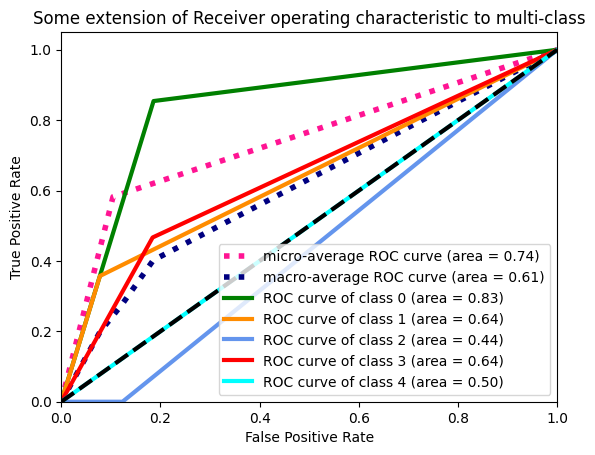

In [17]:
#ROC curve for ANN
from sklearn.preprocessing import label_binarize
y_test_h = label_binarize(y_test, classes=[0, 1, 2, 3, 4])


y_score1 = label_binarize(y_pred4, classes=[0, 1, 2, 3, 4])
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
n_classes=5
lw=3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_h[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_h.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue','red','aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()





<ipython-input-18-bc47aee733a7>:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


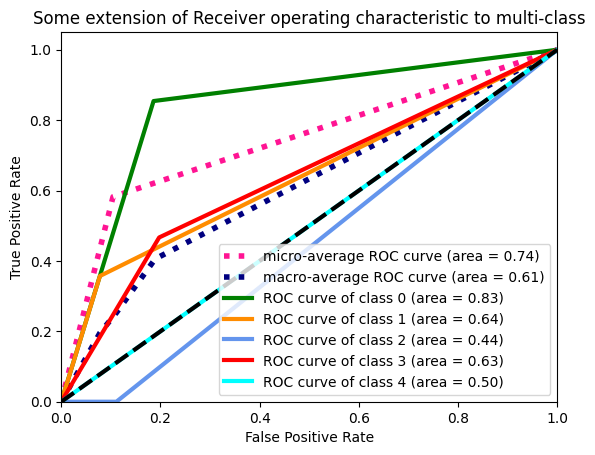

In [18]:

#ROC curve for (ANN+SVM)


from sklearn.preprocessing import label_binarize
y_test_h = label_binarize(y_test, classes=[0, 1, 2, 3, 4])


y_score1 = label_binarize(out, classes=[0, 1, 2, 3, 4])
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
n_classes=5
lw=3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_h[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_h.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue','red','aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



